## Notebook del capítulo 5

In [1]:
# 22/5/24
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Datos
xn= np.array([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 1.00])
yn= np.array([1.00, 1.64, 1.51, 2.03, 2.75, 3.59, 4.87, 5.23, 5.44, 6.37])

Text(0, 0.5, '$v$ [m/s]')

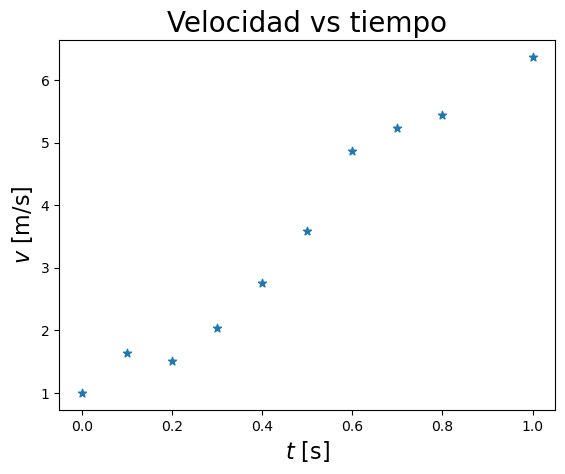

In [3]:
plt.scatter(xn, yn, marker='*') 
plt.title(r'Velocidad vs tiempo', fontsize=20) 
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$v$ [m/s]', fontsize=16)

In [4]:
# Se obtiene el valor de n (numero de datos)
n = len(xn)
# Las sumatorias necesarias 
Sum_x = np.sum(xn)
Sum_y = np.sum(yn)
Sum_xx = np.sum(xn**2)
Sum_xy = np.sum(xn*yn)
Sum_xSumy = np.sum(xn)*np.sum(yn)
Delta = n*np.sum(xn**2) - (np.sum(xn))**2
print(n,',', Sum_x, ',',Sum_y,',', Sum_xx,',', Sum_xy,',', Sum_xSumy, ',',Delta)

10 , 4.6 , 34.43 , 3.04 , 21.275 , 158.378 , 9.240000000000002


In [5]:
# Se escriben las ecuaciones para b y m 
m_mc = (n * Sum_xy - Sum_x * Sum_y) / Delta
b_mc = Sum_y /n - m_mc * Sum_x/n
print('m=',m_mc, ',', 'b=',b_mc)

m= 5.884415584415585 , b= 0.7361688311688313


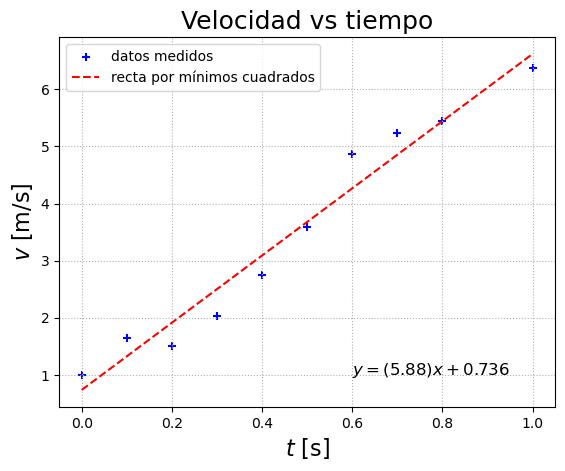

In [6]:
# La gráfica con los datos y la recta que mejor se ajusta 
y_pred= m_mc*xn + b_mc
# 
plt.figure()
plt.scatter(xn, yn, color='b',marker='+', label='datos medidos')
plt.plot(xn, y_pred, 'r--',label='recta por mínimos cuadrados')
plt.grid(linestyle='dotted')
plt.legend(loc='best')
plt.title(r'Velocidad vs tiempo', fontsize=18)
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$v$ [m/s]', fontsize=16)
plt.text(0.6, 1.0, '$y=(5.88) x + 0.736$', fontsize=12)
plt.show()

In [7]:
SSE= np.sum((yn -(b_mc + m_mc*xn))**2)
Sy= np.sqrt(SSE/(n-2))
print('n=',n,',','SSE=', SSE ,',', 'Sy=',Sy)

n= 10 , SSE= 1.244265584415585 , Sy= 0.3943769745458628


In [8]:
Delta_m = np.sqrt(n/(n*np.sum(xn ** 2) - np.sum(xn)**2))*Sy
Delta_b = np.sqrt(np.sum(xn**2)/(n*np.sum(xn**2)-np.sum(xn)**2))*Sy
print(f'm = {np.round(m_mc, 1)} \u00B1 {np.round(Delta_m, 1)}')
print(f'b = {np.round(b_mc, 1)} \u00B1 {np.round(Delta_b, 1)}')

m = 5.9 ± 0.4
b = 0.7 ± 0.2


In [9]:
# Ajustar la recta por mínimos cuadrados usando linalg.lstsq
A = np.vstack([xn, np.ones(len(xn))]).T
m_c, b_c = np.linalg.lstsq(A, yn, rcond=None)[0]
print(f'm = {np.round(m_c, 1)}' )
print(f'b = {np.round(b_c, 1)}' )

m = 5.9
b = 0.7


In [10]:
import statsmodels.api as sm

m = 5.8844 ± 0.4103
b = 0.7362 ± 0.2262


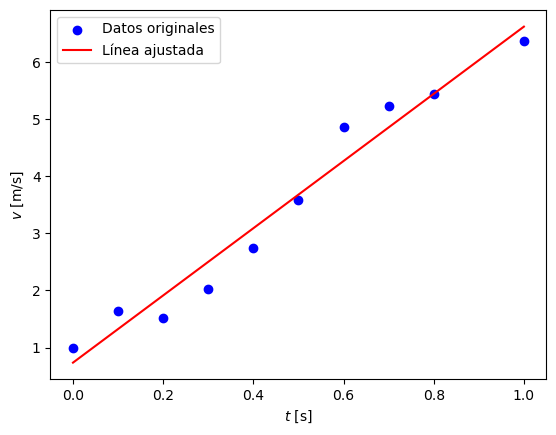

In [11]:
# Agregamos una constante (columna de unos) a xn
X = sm.add_constant(xn)
# Ajustamos el modelo
model = sm.OLS(yn, X).fit()
# Obtenemos los coeficientes y los errores estándar
b, m = model.params
Delta_b, Delta_m = model.bse
# Imprimimos los coeficientes y sus errores estándar
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')
# Generamos valores de y usando los coeficientes obtenidos
y_pred = m * xn + b
# Graficamos los datos originales y la línea ajustada
plt.scatter(xn, yn, color='blue', label='Datos originales')
plt.plot(xn, y_pred, color='red', label='Línea ajustada')
plt.xlabel('$t$ [s]')
plt.ylabel('$v$ [m/s]')
plt.legend()
plt.show()

In [12]:
results = model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 27 May 2024   Prob (F-statistic):           5.45e-07
Time:                        17:07:17   Log-Likelihood:                -3.7692
No. Observations:                  10   AIC:                             11.54
Df Residuals:                       8   BIC:                             12.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7362      0.226      3.254      0.0

/Users/hector/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
# Datos de cizallamiento y edad de la pega
yn = np.array([2158.70, 1678.15, 2316.00, 2061.30, 2207.50,
                          1708.30, 1784.70, 2575.00, 2357.90, 2256.70,
                          2165.20, 2399.55, 1779.80, 2336.75, 1765.30,
                          2053.50, 2414.40, 2200.50, 2654.20, 1753.70])
xn = np.array([15.50, 23.75, 8.00, 17.00, 5.50, 19.00, 24.00, 2.50,
                      7.50, 11.00, 13.00, 3.75, 25.00, 9.75, 22.00, 18.00,
                      6.00, 12.50, 2.00, 21.50])

In [14]:
X = sm.add_constant(xn)
# Ajustamos el modelo
model = sm.OLS(yn, X).fit()
# Obtenemos los coeficientes y los errores estándar
b, m = model.params
Delta_b, Delta_m = model.bse
# Imprimimos los coeficientes y sus errores estándar
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')

m = -37.1536 ± 2.8891
b = 2627.8224 ± 44.1839


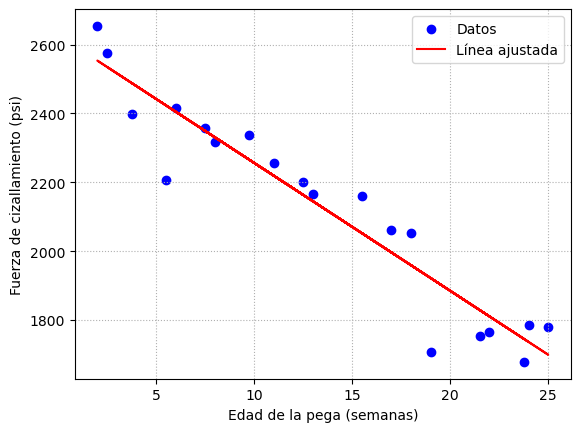

In [15]:
# Generamos valores de y usando los coeficientes obtenidos
y_pred = m * xn + b
# Graficamos los datos originales y la línea ajustada
plt.scatter(xn, yn, color='blue', label='Datos')
plt.plot(xn, y_pred, color='red', label='Línea ajustada')
plt.grid(linestyle='dotted')
plt.legend(loc='best')
plt.xlabel('Edad de la pega (semanas)')
plt.ylabel('Fuerza de cizallamiento (psi)')
plt.legend()
plt.show()

In [16]:
y_pred = m * xn + b
y_pred

array([2051.94169936, 1745.42457406, 2330.59363144, 1996.21131294,
       2423.4776088 , 1921.90413105, 1736.13617632, 2534.93838164,
       2349.17042691, 2219.13285861, 2144.82567672, 2488.49639296,
       1698.98258538, 2265.57484729, 1810.44335821, 1959.05772199,
       2404.90081333, 2163.40247219, 2553.51517711, 1829.02015369])

In [17]:
Sum_y = np.sum(yn)
Sum_y 

42627.149999999994

In [18]:
Sum_yp = np.sum(y_pred)
Sum_yp

42627.149999999965

In [19]:
e_i=yn-y_pred
e_i

array([ 106.75830064,  -67.27457406,  -14.59363144,   65.08868706,
       -215.9776088 , -213.60413105,   48.56382368,   40.06161836,
          8.72957309,   37.56714139,   20.37432328,  -88.94639296,
         80.81741462,   71.17515271,  -45.14335821,   94.44227801,
          9.49918667,   37.09752781,  100.68482289,  -75.32015369])

In [20]:
np.sum(e_i)

3.069544618483633e-11

In [21]:
# Los promedios de x y y 
xp= np.sum(xn)/len(xn) 
yp= np.sum(yn)/len(xn)
print(xp,',', yp,',', m * xp + b)

13.3625 , 2131.3574999999996 , 2131.3574999999983


In [22]:
np.sum(xn*e_i)

4.2746250983327627e-10

In [23]:
np.sum(y_pred*e_i)

6.478512659668922e-08

In [24]:
results = model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     165.4
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.64e-10
Time:                        17:07:17   Log-Likelihood:                -118.63
No. Observations:                  20   AIC:                             241.3
Df Residuals:                      18   BIC:                             243.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2627.8224     44.184     59.475      0.0

In [25]:
SS_T=np.sum(yn**2)-len(xn)*yp**2
SS_T

1693737.6013750285

In [26]:
SS_R= SS_T - m*np.sum(yn*(xn-xp))
SS_R

166254.85806700774

In [32]:
s=SS_R/(len(xn)-2)
s

9236.381003722652

In [30]:
np.sqrt(np.sum(e_i**2)/(len(xn)-2))

96.10609243810288

In [44]:
np.sqrt(s*(1/len(xn)+xp**2/(np.sum((xn-xp)**2))))

44.18391179818215

In [43]:
np.sqrt(s/(np.sum((xn-xp)**2)) )

2.8891065489221495

In [48]:
xp**2

178.55640625

In [51]:
np.sum((xn-xp)**2)

1106.559375